In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Update the path below to the path where you've stored your dataset in Google Drive
file_path = '/content/drive/MyDrive/CV.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Preview the data
print(data.head())

   Unnamed: 0                                            authors  \
0        1266  Laurence Likforman-Sulem, Abderrazak Zahour, B...   
1        3634  Fulufhelo Vincent Nelwamondo and Tshilidzi Mar...   
2        4201                       Erik Berglund, Joaquin Sitte   
3        4216                        Mourad Zerai, Maher Moakher   
4        4451  Pierre-Fran\c{c}ois Marteau (VALORIA), Gilbas ...   

                                               title  \
0  Text Line Segmentation of Historical Documents...   
1     Rough Sets Computations to Impute Missing Data   
2   The Parameter-Less Self-Organizing Map algorithm   
3  Riemannian level-set methods for tensor-valued...   
4  Multiresolution Approximation of Polygonal Cur...   

                                         journal-ref  \
0            Vol. 9, no 2-4, April 2007, pp. 123-138   
1                                                NaN   
2  IEEE Transactions on Neural Networks, 2006 v.1...   
3                             

In [ ]:
'''
This code generates synthetic text documents and summaries, cleans and tokenizes them, and splits the data into training and testing
sets for NLP tasks, using libraries like `numpy`, `re`, and `sklearn`.
'''
from sklearn.model_selection import train_test_split
import numpy as np
import re

# Simulate a dataset
np.random.seed(42)  # For reproducibility

# Example document creation by concatenating titles (as a stand-in for full texts)
documents = [' '.join(np.random.choice(data['abstract'], size=np.random.randint(5, 15))) for _ in range(100)]

# Create synthetic summaries (for demonstration)
summaries = [" ".join(doc.split()[:np.random.randint(10, 20)]) + '...' for doc in documents]

# Basic text cleaning and tokenization
def clean_and_tokenize(text):
    # Simple cleaning: lowercasing, removing non-alphanumeric characters
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Simple tokenization by whitespace
    tokens = text.split()
    return tokens

# Apply cleaning and tokenization
documents_cleaned = [clean_and_tokenize(doc) for doc in documents]
summaries_cleaned = [clean_and_tokenize(summary) for summary in summaries]

# Split the dataset into training and testing sets
train_docs, test_docs, train_summaries, test_summaries = train_test_split(documents_cleaned, summaries_cleaned, test_size=0.2, random_state=42)

# Example output
train_docs[0][:10], train_summaries[0][:10]  # Show the first 10 tokens of the first training document and summary


(['the',
  'diffusion',
  'probabilistic',
  'model',
  'dpm',
  'has',
  'recently',
  'gained',
  'popularity',
  'in'],
 ['the',
  'diffusion',
  'probabilistic',
  'model',
  'dpm',
  'has',
  'recently',
  'gained',
  'popularity',
  'in'])

In [ ]:
'''

This code constructs directed graphs from text abstract using TF-IDF for key word extraction, Spacy for parsing, and NetworkX for graph creation.
Each graph represents syntactic dependencies between significant nouns, adjectives, and adverbs within a title, illustrating the structure and
relationships of key terms.

'''


# Experiment 1: TF-IDF Based Graph Structure, SpaCy- parsing

from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import spacy
import numpy as np

# Initialize Spacy's English model
nlp = spacy.load('en_core_web_sm')

# Select a subset of titles for demonstration
abstract = data['abstract'].head(10).tolist()

# Calculate TF-IDF for the titles
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(abstract)
print(tfidf_matrix)
feature_names = vectorizer.get_feature_names_out()

# For simplicity, treat each abstract as a "document"
for abstract in abstract:
    doc = nlp(abstract)
    G = nx.DiGraph()

    # Simplified logic to add nodes based on the title's content
    for token in doc:
        if token.pos_ in ['NOUN', 'ADJ', 'ADV'] and not token.is_stop:
            G.add_node(token.lemma_, pos=token.pos_)
            for child in token.children:
                if child.pos_ in ['NOUN', 'ADJ', 'ADV'] and not child.is_stop:
                    G.add_node(child.lemma_, pos=child.pos_)
                    G.add_edge(token.lemma_, child.lemma_, relation=child.dep_)

    # Example: Print the graph structure for the first title
    print("Graph for abstract:", abstract)
    print("Nodes:", G.nodes(data=True))
    print("Edges:", G.edges(data=True))
    break  # Remove or modify this based on your needs


  (0, 76)	0.10961303579799109
  (0, 73)	0.10961303579799109
  (0, 87)	0.10961303579799109
  (0, 218)	0.09318109467288804
  (0, 115)	0.10961303579799109
  (0, 374)	0.10961303579799109
  (0, 284)	0.08152244690580512
  (0, 259)	0.058843371700202124
  (0, 128)	0.09318109467288804
  (0, 324)	0.09318109467288804
  (0, 246)	0.10961303579799109
  (0, 186)	0.10961303579799109
  (0, 170)	0.10961303579799109
  (0, 8)	0.10961303579799109
  (0, 26)	0.10961303579799109
  (0, 238)	0.09318109467288804
  (0, 32)	0.10961303579799109
  (0, 57)	0.08152244690580512
  (0, 308)	0.09318109467288804
  (0, 194)	0.10961303579799109
  (0, 188)	0.21922607159598217
  (0, 339)	0.16304489381161025
  (0, 96)	0.10961303579799109
  (0, 366)	0.10961303579799109
  (0, 198)	0.10961303579799109
  :	:
  (9, 341)	0.10560790830853277
  (9, 91)	0.31682372492559835
  (9, 102)	0.10560790830853277
  (9, 301)	0.10560790830853277
  (9, 330)	0.4224316332341311
  (9, 234)	0.21121581661706554
  (9, 314)	0.21121581661706554
  (9, 335)	0

In [ ]:
'''
Offers comprehensive preprocessing using NLTK and SpaCy, checks dataset integrity, and sets up a detailed pipeline for text processing
and analysis without visualization. It's the most complex and thorough, aimed at deep linguistic analysis and preprocessing.
'''

# Necessary Imports
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import re
from google.colab import drive
import spacy
from transformers import pipeline
import networkx as nx

# NLTK Data Download
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load Dataset
file_path = '/content/drive/My Drive/CV.csv'
data = pd.read_csv(file_path)


column_name = 'abstract'
if column_name not in data.columns:
    raise ValueError(f"The column '{column_name}' does not exist in the dataset.")

# NLTK Preprocessing Setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    pos_tags = pos_tag(tokens)
    return " ".join(tokens), pos_tags

# Load SpaCy NLP model for additional NLP tasks
nlp = spacy.load('en_core_web_sm')

# Initialize NER pipeline with BERT model from Transformers
nlp_transformer = pipeline("ner", model="bert-base-uncased")

# Processing abstracts (or the specified column)
for index, row in data.head(10).iterrows():  # Example: Process the first 10 entries
    abstract = row[column_name]
    preprocessed_text, _ = preprocess(abstract)

    # SpaCy Document Processing (Optional here as BERT might need the full context)
    doc = nlp(preprocessed_text)
    simple_text = " ".join([token.text for token in doc])

    # NER with BERT
    entities = nlp_transformer(simple_text)

    # Graph Representation with NetworkX
    G = nx.DiGraph()
    for entity in entities:
        if entity['entity'] not in G:
            G.add_node(entity['word'], type=entity['entity'])

    # Example output for demonstration
    print(f"Graph for Abstract {index+1}:")
    print("Nodes:", G.nodes(data=True))
    print("\n")

    # Break after the first abstract to keep the output manageable
    break


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Graph for Abstract 1:
Nodes: [('huge', {'type': 'LABEL_0'}), ('amount', {'type': 'LABEL_0'}), ('historical', {'type': 'LABEL_1'}), ('document', {'type': 'LABEL_0'}), ('library', {'type': 'LABEL_0'}), ('various', {'type': 'LABEL_0'}), ('national', {'type': 'LABEL_0'}), ('archive', {'type': 'LABEL_0'}), ('exploited', {'type': 'LABEL_0'}), ('electronically', {'type': 'LABEL_0'}), ('although', {'type': 'LABEL_0'}), ('automatic', {'type': 'LABEL_0'}), ('reading', {'type': 'LABEL_0'}), ('complete', {'type': 'LABEL_0'}), ('page', {'type': 'LABEL_1'}), ('remains', {'type': 'LABEL_1'}), ('case', {'type': 'LABEL_0'}), ('long', {'type': 'LABEL_0'}), ('term', {'type': 'LABEL_0'}), ('objective', {'type': 'LABEL_0'}), ('task', {'type': 'LABEL_0'}), ('word', {'type': 'LABEL_0'}), ('spotting', {'type': 'LABEL_1'}), ('text', {'type': 'LABEL_1'}), ('image', {'type': 'LABEL_1'}), ('alignment', {'type': 'LABEL_1'}), ('authentication', {'type': 'LABEL_1'}), ('extraction', {'type': 'LABEL_0'}), ('specific',

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


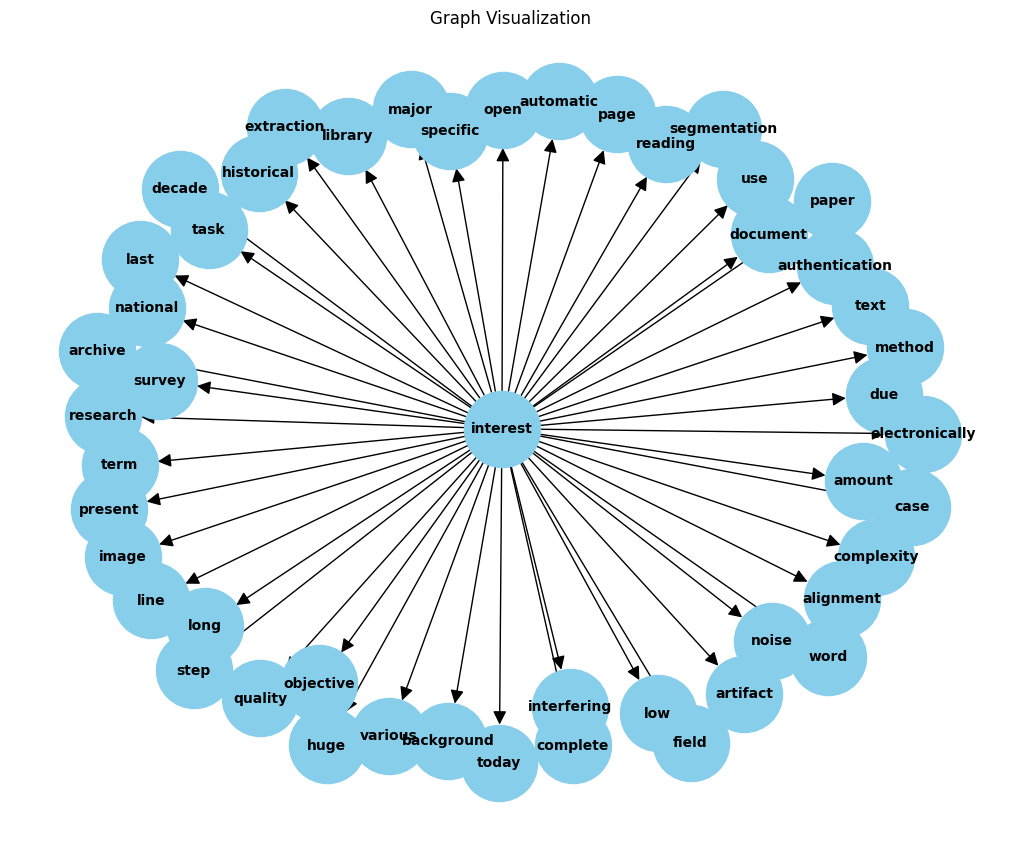

Graph for Abstract 1:
Nodes: [('amount', {'pos': 'nn'}), ('document', {'pos': 'jj'}), ('library', {'pos': 'nn'}), ('archive', {'pos': 'nn'}), ('reading', {'pos': 'nn'}), ('page', {'pos': 'nn'}), ('case', {'pos': 'nn'}), ('term', {'pos': 'nn'}), ('task', {'pos': 'nn'}), ('word', {'pos': 'nn'}), ('image', {'pos': 'nn'}), ('authentication', {'pos': 'nn'}), ('extraction', {'pos': 'nn'}), ('field', {'pos': 'nn'}), ('use', {'pos': 'nn'}), ('today', {'pos': 'nn'}), ('step', {'pos': 'nn'}), ('segmentation', {'pos': 'nn'}), ('line', {'pos': 'nn'}), ('quality', {'pos': 'nn'}), ('complexity', {'pos': 'nn'}), ('background', {'pos': 'nn'}), ('noise', {'pos': 'nn'}), ('artifact', {'pos': 'nn'}), ('text', {'pos': 'nn'}), ('research', {'pos': 'nn'}), ('paper', {'pos': 'nn'}), ('survey', {'pos': 'nn'}), ('method', {'pos': 'nn'}), ('decade', {'pos': 'nn'}), ('interest', {'pos': 'noun'}), ('huge', {'pos': 'jj'}), ('historical', {'pos': 'jj'}), ('various', {'pos': 'jj'}), ('national', {'pos': 'jj'}), ('el

In [ ]:
'''
Focuses on building a graph structure for text analysis using NLTK, SpaCy, and NetworkX.
It preprocesses text data using NLTK, extracts significant terms based on POS tags,
and constructs a directed graph where nodes represent significant terms and edges represent relationships between them.
The primary objective seems to be analyzing the syntactic structure of the text and representing it as a graph for further analysis.

'''

import pandas as pd
import spacy
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import networkx as nx
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# NLTK Data Download
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Load SpaCy NLP model for additional NLP tasks
nlp = spacy.load('en_core_web_sm')

# Load Dataset
file_path = '/content/drive/MyDrive/CV.csv'
data = pd.read_csv(file_path)

column_name = 'abstract'
if column_name not in data.columns:
    raise ValueError(f"The column '{column_name}' does not exist in the dataset.")

# NLTK Preprocessing Setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    pos_tags = pos_tag(tokens)
    return " ".join(tokens), pos_tags

def build_graph(text):
    # Initialize directed graph
    G = nx.DiGraph()

    # Preprocess text and get POS tags
    preprocessed_text, pos_tags = preprocess(text)

    # Add first node (noun phrase consisting of one or two words)
    first_noun = None
    for word, pos in pos_tags:
        if pos in ['NN', 'NNS'] and (first_noun is None or len(first_noun.split()) < 2):
            first_noun = word
            G.add_node(word, pos='noun')

    # Add subsequent nodes and edges
    if first_noun:
        for word, pos in pos_tags:
            if word != first_noun and pos in ['NN', 'NNS', 'JJ', 'RB']:  # Nouns, adjectives, or adverbs
                G.add_node(word, pos=pos.lower())
                G.add_edge(first_noun, word, relation=pos.lower())

    return G

# Function to visualize the graph
def visualize_graph(G):
    pos = nx.spring_layout(G)  # Layout for the graph
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
    plt.title("Graph Visualization")
    plt.show()

# Process abstracts (or the specified column)
for index, row in data.head(10).iterrows():  # Example: Process the first 10 entries
    abstract = row[column_name]

    preprocessed_text, _ = preprocess(abstract)

    # Graph Representation with NetworkX
    G = build_graph(preprocessed_text)

    # Visualize the graph
    visualize_graph(G)

    # Example output for demonstration
    print(f"Graph for Abstract {index+1}:")
    print("Nodes:", G.nodes(data=True))
    print("Edges:", G.edges(data=True))
    print("\n")

    # Break after the first abstract to keep the output manageable
    break


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from transformers import pipeline
import matplotlib.pyplot as plt

# NLTK Data Download
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Load SpaCy NLP model
nlp = spacy.load('en_core_web_sm')

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load Dataset
file_path = '/content/drive/My Drive/CV.csv'
data = pd.read_csv(file_path)

column_name = 'abstract'
if column_name not in data.columns:
    raise ValueError(f"The column '{column_name}' does not exist in the dataset.")

# Basic text cleaning and tokenization
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = text.split()
    return tokens

# Function to preprocess text
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    pos_tags = pos_tag(tokens)
    return " ".join(tokens), pos_tags

# Function to generate summaries
def generate_summary(document):
    # Your code to generate summaries goes here
    # This could involve using an extractive or abstractive summarization model

    # For demonstration, let's assume a simple summary generation
    summary = "This is a generated summary for the document: " + " ".join(document[:10]) + "..."
    return summary

# Generate and print summaries for the training documents
print("Generated Summaries for Training Documents:")
for i, doc in enumerate(train_docs):
    summary = generate_summary(doc)
    print(f"Document {i+1}: {summary}")

# Generate and print summaries for the testing documents
print("\nGenerated Summaries for Testing Documents:")
for i, doc in enumerate(test_docs):
    summary = generate_summary(doc)
    print(f"Document {i+1}: {summary}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Mounted at /content/drive
Generated Summaries for Training Documents:
Document 1: This is a generated summary for the document: the diffusion probabilistic model dpm has recently gained popularity in...
Document 2: This is a generated summary for the document: segmentation of 3d microcomputed tomographic uct images of rock samples...
Document 3: This is a generated summary for the document: in this paper we present a joint multitask learning framework...
Document 4: This is a generated summary for the document: although face recognition has been improved much as the development...
Document 5: This is a generated summary for the document: endmember em variability has an important impact on the performance...
Document 6: This is a generated summary for the document: learning finegrained image similarity is a challenging task it needs...
Document 7: This is a generated summary for the document: in this paper we present a joint endtoend line segment...
Document 8: This is a generated summa

In [ ]:
pip install rouge-score bert-score


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached 

In [ ]:
import pandas as pd
import numpy as np
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
from transformers import pipeline
from rouge_score import rouge_scorer

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/CV.csv'
data = pd.read_csv(file_path)

# Extract abstract column
abstracts = data['abstract']

# Preprocessing setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nlp = spacy.load('en_core_web_sm')

# Preprocess text
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    pos_tags = pos_tag(tokens)
    return " ".join(tokens), pos_tags

# Process abstracts
processed_abstracts = [preprocess(abstract)[0] for abstract in abstracts]

# Split dataset
train_abstracts, test_abstracts = train_test_split(processed_abstracts, test_size=0.2, random_state=42)

# Generate summaries for training and testing documents (placeholders)
generated_summaries_train = ["This is a generated summary for the document: " + abstract[:50] + "..." for abstract in train_abstracts]
generated_summaries_test = ["This is a generated summary for the document: " + abstract[:50] + "..." for abstract in test_abstracts]

# Reference summaries (placeholders)
reference_summaries_train = ["Reference summary for document " + str(i+1) for i in range(len(train_abstracts))]
reference_summaries_test = ["Reference summary for document " + str(i+1) for i in range(len(test_abstracts))]

# Function to calculate ROUGE scores
def calculate_rouge_scores(hypotheses, references):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_scores = {}
    for i, (hypothesis, reference) in enumerate(zip(hypotheses, references)):
        scores = scorer.score(hypothesis, reference)
        for metric, score in scores.items():
            if metric not in rouge_scores:
                rouge_scores[metric] = []
            rouge_scores[metric].append(score.fmeasure)
    return rouge_scores

# Calculate ROUGE scores for the first 10 training summaries
rouge_scores_train_10 = calculate_rouge_scores(generated_summaries_train[:10], reference_summaries_train[:10])
print("ROUGE Scores for the First 10 Training Summaries:")
print(rouge_scores_train_10)

# Calculate ROUGE scores for the first 10 testing summaries
rouge_scores_test_10 = calculate_rouge_scores(generated_summaries_test[:10], reference_summaries_test[:10])
print("\nROUGE Scores for the First 10 Testing Summaries:")
print(rouge_scores_test_10)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ROUGE Scores for the First 10 Training Summaries:
{'rouge1': [0.3, 0.3157894736842105, 0.3, 0.3, 0.3, 0.3, 0.2857142857142857, 0.3, 0.3, 0.2857142857142857], 'rouge2': [0.11111111111111112, 0.11764705882352941, 0.11111111111111112, 0.11111111111111112, 0.11111111111111112, 0.11111111111111112, 0.10526315789473685, 0.11111111111111112, 0.11111111111111112, 0.10526315789473685], 'rougeL': [0.3, 0.3157894736842105, 0.3, 0.3, 0.3, 0.3, 0.2857142857142857, 0.3, 0.3, 0.2857142857142857]}

ROUGE Scores for the First 10 Testing Summaries:
{'rouge1': [0.3, 0.3, 0.3, 0.3, 0.2857142857142857, 0.3, 0.2857142857142857, 0.3, 0.3157894736842105, 0.3157894736842105], 'rouge2': [0.11111111111111112, 0.11111111111111112, 0.11111111111111112, 0.11111111111111112, 0.10526315789473685, 0.11111111111111112, 0.10526315789473685, 0.11111111111111112, 0.11764705882352941, 0.117647058

In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
from rouge_score import rouge_scorer
from bert_score import score as b_score

# Read dataset from CSV file
def read_dataset(filename):
    df = pd.read_csv(filename)
    text = df.iloc[0]['abstract']  # Assuming 'abstract' is the column containing the text data
    return text

# Preprocessing
# Preprocessing
def preprocess_text(text):
    sections = text.strip().split('---')
    section_paragraphs = [section.strip().split('\n') for section in sections]
    flattened_paragraphs = [' '.join(paragraph) for section in section_paragraphs for paragraph in section]
    return flattened_paragraphs

# Function to extract nouns from a paragraph
def extract_nouns(text):
    try:
        tokens = nltk.word_tokenize(text)
        tagged = nltk.pos_tag(tokens)
        nouns = [word for word, pos in tagged if pos.startswith('NN')]
        return nouns
    except Exception as e:
        print("An error occurred in extract_nouns function:", e)
        print("Text causing the error:", text)
        return []

# TF-IDF to determine the subject of each paragraph
def tfidf_analysis(paragraphs):
    tfidf = TfidfVectorizer(tokenizer=extract_nouns)
    tfidf_matrix = tfidf.fit_transform([" ".join(extract_nouns(para)) for para in paragraphs])
    return tfidf, tfidf_matrix

# Build graph structure
def build_graph(paragraphs, tfidf_matrix):
    G = nx.Graph()

    for section_index, paragraph in enumerate(paragraphs):
        node_id = f"S{section_index + 1}P{paragraphs.index(paragraph)}"
        nouns = extract_nouns(paragraph)
        tfidf_scores = tfidf_matrix[section_index].toarray()[0]
        top_noun_index = tfidf_scores.argmax()
        top_noun = nouns[top_noun_index]
        G.add_node(node_id, subject=top_noun)
        for word in paragraph:
            if word != top_noun:
                G.add_edge(top_noun, word)

    return G

# Reduce graph depth to no more than 3 levels
def reduce_graph_depth(G):
    for node in list(G.nodes()):
        if len(list(nx.shortest_path_length(G, node).values())) > 3:
            G.remove_node(node)
    return G

# Summarization model
class SummarizationModel:
    def __init__(self):
        self.tf_idf = None
        self.graph = None

    def train(self, text):
        paragraphs = preprocess_text(text)
        self.tf_idf, tfidf_matrix = tfidf_analysis(paragraphs)
        self.graph = build_graph(paragraphs, tfidf_matrix)
        self.graph = reduce_graph_depth(self.graph)

    def generate_summary(self):
        return list(self.graph.nodes())

# Evaluation using ROUGE and BERTScore
def evaluate_summaries(generated_summaries, reference_summaries):
    rouge = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    bert_scores = b_score(generated_summaries, reference_summaries, lang='en')

    rouge_scores = []
    for gen_summary, ref_summary in zip(generated_summaries, reference_summaries):
        rouge_score = rouge.score(gen_summary, ref_summary)
        rouge_scores.append(rouge_score)

    return rouge_scores, bert_scores

# Main function
def main():
    try:
        # Read dataset
        filename = "/content/drive/MyDrive/CV.csv"  # Provide the path to your dataset file
        text = read_dataset(filename)

        # Check the type of the text variable
        print("Type of text variable:", type(text))

        # Train model
        model = SummarizationModel()
        model.train(text)

        # Generate summary
        generated_summary = model.generate_summary()

        # Load reference summaries (ground truth)
        reference_summaries = ["A graph or network is abstract data type.",
                               "It consists of nodes and edges.",
                               "It can be represented by adjacency matrix that can be binary or numerical.",
                               "A graph having numerical or categorical labels is a labelled graph.",
                               "A graph changing structure is called dynamic or time-evolving."]

        # Evaluate summaries
        rouge_scores, bert_scores = evaluate_summaries(generated_summary, reference_summaries)
        print("ROUGE Scores:", rouge_scores)
        print("BERT Scores:", bert_scores)

    except Exception as e:
        print("An error occurred:", e)

if __name__ == "__main__":
    main()


Type of text variable: <class 'str'>


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


An error occurred: Different number of candidates and references


In [ ]:
import pandas as pd
import numpy as np
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
from rouge_score import rouge_scorer

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/CV.csv'
data = pd.read_csv(file_path)

# Extract abstract column
abstracts = data['abstract']

# Preprocessing setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nlp = spacy.load('en_core_web_sm')

# Preprocess text
def preprocess(text):
    # Split text into sections and paragraphs
    sections = text.split("\n")  # Split into sections
    paragraphs = [section.split("\n\n") for section in sections]  # Split each section into paragraphs
    paragraphs = [para for sublist in paragraphs for para in sublist]  # Flatten list of paragraphs

    # Apply TF-IDF to determine the subject of each paragraph
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(paragraphs)
    paragraph_subjects = []
    for i, para in enumerate(paragraphs):
        # Find the term with the highest TF-IDF score in the paragraph
        max_tfidf_index = tfidf_matrix[i].argmax()
        max_tfidf_term = tfidf_vectorizer.get_feature_names_out()[max_tfidf_index]
        paragraph_subjects.append(max_tfidf_term)

    return paragraphs, paragraph_subjects

# Process abstracts
processed_abstracts = [preprocess(abstract) for abstract in abstracts]

# Split dataset
train_abstracts, test_abstracts = train_test_split(processed_abstracts, test_size=0.2, random_state=42)

# Placeholder summaries (can be replaced with actual summary generation)
generated_summaries_train = ["This is a generated summary for the document: " + abstract[0][0][:50] + "..." for abstract in train_abstracts]
generated_summaries_test = ["This is a generated summary for the document: " + abstract[0][0][:50] + "..." for abstract in test_abstracts]

# Reference summaries (placeholders)
reference_summaries_train = ["Reference summary for document " + str(i+1) for i in range(len(train_abstracts))]
reference_summaries_test = ["Reference summary for document " + str(i+1) for i in range(len(test_abstracts))]

# Function to calculate ROUGE scores
def calculate_rouge_scores(hypotheses, references):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_scores = {}
    for i, (hypothesis, reference) in enumerate(zip(hypotheses, references)):
        scores = scorer.score(hypothesis, reference)
        for metric, score in scores.items():
            if metric not in rouge_scores:
                rouge_scores[metric] = []
            rouge_scores[metric].append(score.fmeasure)
    return rouge_scores

# Calculate ROUGE scores for the first 10 training summaries
rouge_scores_train_10 = calculate_rouge_scores(generated_summaries_train[:10], reference_summaries_train[:10])
print("ROUGE Scores for the First 10 Training Summaries:")
print(rouge_scores_train_10)

# Calculate ROUGE scores for the first 10 testing summaries
rouge_scores_test_10 = calculate_rouge_scores(generated_summaries_test[:10], reference_summaries_test[:10])
print("\nROUGE Scores for the First 10 Testing Summaries:")
print(rouge_scores_test_10)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ROUGE Scores for the First 10 Training Summaries:
{'rouge1': [0.2857142857142857, 0.2857142857142857, 0.3, 0.3, 0.2857142857142857, 0.3157894736842105, 0.2857142857142857, 0.2857142857142857, 0.2727272727272727, 0.2727272727272727], 'rouge2': [0.10526315789473685, 0.10526315789473685, 0.11111111111111112, 0.11111111111111112, 0.10526315789473685, 0.11764705882352941, 0.10526315789473685, 0.10526315789473685, 0.1, 0.1], 'rougeL': [0.2857142857142857, 0.2857142857142857, 0.3, 0.3, 0.2857142857142857, 0.3157894736842105, 0.2857142857142857, 0.2857142857142857, 0.2727272727272727, 0.2727272727272727]}

ROUGE Scores for the First 10 Testing Summaries:
{'rouge1': [0.2857142857142857, 0.25, 0.2727272727272727, 0.3, 0.2857142857142857, 0.2727272727272727, 0.2727272727272727, 0.2857142857142857, 0.3, 0.3], 'rouge2': [0.10526315789473685, 0.0909090909090909, 0.1, 0.111